### 잠재 변수와 노이즈를 사용하여 상관 관계가 있는 데이터를 생성하는 방법과 이러한 데이터의 상관 구조를 분석하는 방법

In [1]:
import numpy as np

n = 500

# 정규 분포를 따르는 무작위 값
l1 = np.random.normal(size=n)
l2 = np.random.normal(size=n)

# latents 배열: 잠재 변수를 반복하여 데이터의 구조
latents = np.array([l1, l1, l2, l2]).T
X = latents + np.random.normal(size=4 * n).reshape((n, 4))
Y = latents + np.random.normal(size=4 * n).reshape((n, 4))

# train / test split
X_train = X[: n // 2]
Y_train = Y[: n // 2]
X_test = X[n // 2 :]
Y_test = Y[n // 2 :]

print("Corr(X)")
print(np.round(np.corrcoef(X.T), 2))
print("Corr(Y)")
print(np.round(np.corrcoef(Y.T), 2))

Corr(X)
[[ 1.    0.51 -0.07  0.01]
 [ 0.51  1.   -0.06 -0.08]
 [-0.07 -0.06  1.    0.49]
 [ 0.01 -0.08  0.49  1.  ]]
Corr(Y)
[[ 1.    0.58  0.    0.  ]
 [ 0.58  1.   -0.03 -0.04]
 [ 0.   -0.03  1.    0.5 ]
 [ 0.   -0.04  0.5   1.  ]]


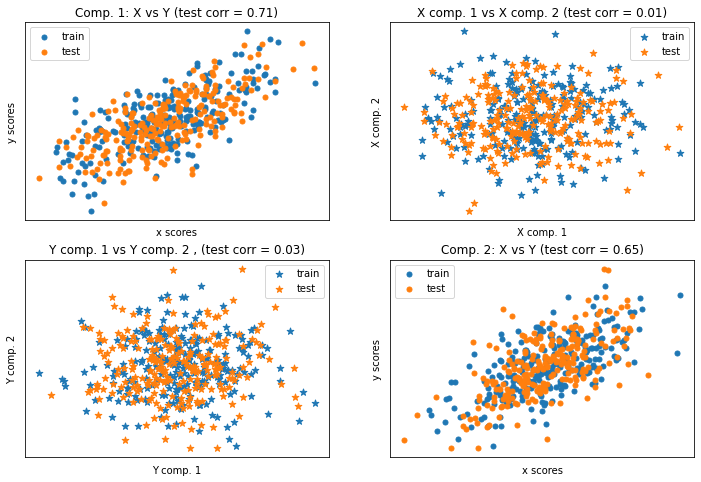

In [3]:
from sklearn.cross_decomposition import PLSCanonical

# 두 개의 주성분을 사용하여 X_train과 Y_train 데이터에 대해 학습
plsca = PLSCanonical(n_components=2)
plsca.fit(X_train, Y_train)

# 데이터 변환:
X_train_r, Y_train_r = plsca.transform(X_train, Y_train)
X_test_r, Y_test_r = plsca.transform(X_test, Y_test)

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.subplot(221)
plt.scatter(X_train_r[:, 0], Y_train_r[:, 0], label="train", marker="o", s=25)
plt.scatter(X_test_r[:, 0], Y_test_r[:, 0], label="test", marker="o", s=25)
plt.xlabel("x scores")
plt.ylabel("y scores")
plt.title(
    "Comp. 1: X vs Y (test corr = %.2f)"
    % np.corrcoef(X_test_r[:, 0], Y_test_r[:, 0])[0, 1]
)
plt.xticks(())
plt.yticks(())
plt.legend(loc="best")

plt.subplot(224)
plt.scatter(X_train_r[:, 1], Y_train_r[:, 1], label="train", marker="o", s=25)
plt.scatter(X_test_r[:, 1], Y_test_r[:, 1], label="test", marker="o", s=25)
plt.xlabel("x scores")
plt.ylabel("y scores")
plt.title(
    "Comp. 2: X vs Y (test corr = %.2f)"
    % np.corrcoef(X_test_r[:, 1], Y_test_r[:, 1])[0, 1]
)
plt.xticks(())
plt.yticks(())
plt.legend(loc="best")

plt.subplot(222)
plt.scatter(X_train_r[:, 0], X_train_r[:, 1], label="train", marker="*", s=50)
plt.scatter(X_test_r[:, 0], X_test_r[:, 1], label="test", marker="*", s=50)
plt.xlabel("X comp. 1")
plt.ylabel("X comp. 2")
plt.title(
    "X comp. 1 vs X comp. 2 (test corr = %.2f)"
    % np.corrcoef(X_test_r[:, 0], X_test_r[:, 1])[0, 1]
)
plt.legend(loc="best")
plt.xticks(())
plt.yticks(())

plt.subplot(223)
plt.scatter(Y_train_r[:, 0], Y_train_r[:, 1], label="train", marker="*", s=50)
plt.scatter(Y_test_r[:, 0], Y_test_r[:, 1], label="test", marker="*", s=50)
plt.xlabel("Y comp. 1")
plt.ylabel("Y comp. 2")
plt.title(
    "Y comp. 1 vs Y comp. 2 , (test corr = %.2f)"
    % np.corrcoef(Y_test_r[:, 0], Y_test_r[:, 1])[0, 1]
)
plt.legend(loc="best")
plt.xticks(())
plt.yticks(())
plt.show()

In [7]:
#Partial Least Squares Regression (PLSRegression)을 사용하여 다변량 및 단변량 데이터에 대한 회귀 분석
from sklearn.cross_decomposition import PLSRegression

n = 1000
q = 3
p = 10
X = np.random.normal(size=n * p).reshape((n, p))
B = np.array([[1, 2] + [0] * (p - 2)] * q).T

Y = np.dot(X, B) + np.random.normal(size=n * q).reshape((n, q)) + 5

# PLS 모델 학습 및 계수 출력:
pls2 = PLSRegression(n_components=3)
pls2.fit(X, Y)
print("True B (such that: Y = XB + Err)")
print(B)

print("Estimated B")
print(np.round(pls2.coef_, 1))
pls2.predict(X)

True B (such that: Y = XB + Err)
[[1 1 1]
 [2 2 2]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]]
Estimated B
[[ 1.   2.   0.  -0.  -0.  -0.  -0.   0.   0.  -0. ]
 [ 1.   1.9  0.  -0.  -0.  -0.   0.   0.  -0.  -0. ]
 [ 1.   1.9 -0.  -0.  -0.   0.   0.  -0.1 -0.  -0. ]]


array([[4.42028579, 4.43752245, 4.35327448],
       [6.31451116, 6.26255417, 6.38849592],
       [4.7881114 , 4.84420267, 4.65649443],
       ...,
       [7.0792506 , 7.05540819, 7.18254647],
       [4.00160592, 4.04032111, 3.97618817],
       [6.95284866, 6.90817266, 6.82990752]])

In [5]:
n = 1000
p = 10
X = np.random.normal(size=n * p).reshape((n, p))
y = X[:, 0] + 2 * X[:, 1] + np.random.normal(size=n * 1) + 5
pls1 = PLSRegression(n_components=3)
pls1.fit(X, y)

print("Estimated betas")
print(np.round(pls1.coef_, 1))

Estimated betas
[[ 1.1  1.9  0.1 -0.1 -0.  -0.  -0.  -0.  -0.   0. ]]


In [6]:
# Canonical Correlation Analysis (CCA)를 사용하여 두 세트의 변수 사이의 관계를 분석
from sklearn.cross_decomposition import CCA

cca = CCA(n_components=2)
cca.fit(X_train, Y_train)
X_train_r, Y_train_r = cca.transform(X_train, Y_train)
X_test_r, Y_test_r = cca.transform(X_test, Y_test)

### PLS는 변수들 간의 상관 관계가 높고, 설명 변수의 수가 관측치의 수보다 많거나 비슷할 때 특히 유용하다. 이는 고차원 데이터에 대한 회귀 문제를 해결하는 데 강력한 도구가 된다.